<a href="https://colab.research.google.com/github/soleildeminuit/AI-Samhallsplanering-Course/blob/main/AI_Samhallsplanering_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip Install Packages

In [6]:
!pip install rasterio
!pip install geopandas


# Hämta geodata

***Här är den första textcellen***

In [ ]:
import requests
import zipfile
import io
import os

url = "https://www.scb.se/contentassets/3443fea3fa6640f7a57ea15d9a372d33/shape_svenska_220223.zip"

response = requests.get(url)
os.makedirs('/content/sample_data/geodata', exist_ok=True)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
    zip_file.extractall('/content/sample_data/geodata')

    # Extract all zipped files
    for file in zip_file.namelist():
        if file.endswith('.zip'):
            with zipfile.ZipFile(io.BytesIO(zip_file.read(file))) as inner_zip_file:
                inner_zip_file.extractall('/content/sample_data/geodata')


--2023-11-21 20:03:13--  https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shp
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/soleildeminuit/AI-Samhallsplanering-Course/main/data/raw/Kommun_Sweref99TM_region.shp [following]
--2023-11-21 20:03:13--  https://raw.githubusercontent.com/soleildeminuit/AI-Samhallsplanering-Course/main/data/raw/Kommun_Sweref99TM_region.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172404 (168K) [application/octet-stream]
Saving to: ‘Kommun_Sweref99TM_region.shp.1’

Kommun_Sweref99TM_r 100%[==================

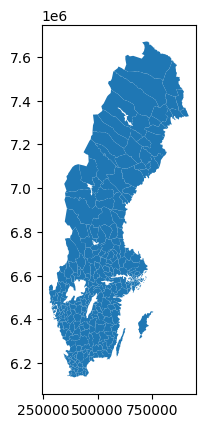

In [ ]:
!pip install geopandas
!pip install descartes
import geopandas as gpd
import matplotlib.pyplot as plt

# Ladda ner shape-filen
!wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shp

# Läs in shape-filen
try:
    shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")
except ValueError:
    # Ladda ner filerna som saknas
    !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.cpg
    !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.dbf
    !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.prj
    !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shx
    shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")

# Rita kartan
shapefile.plot()
plt.show()


# Hämta rasterdata

In [3]:
import requests
from io import BytesIO
import rasterio
import geopandas as gpd

# Lista med filnamn i katalogen
filnamn_lista = ["Stockholm_2017_2022.tif", "Forskolor_ht23_sweref.gpkg"]  # Uppdatera med faktiska filnamn

# Bas-URL för GitHub-repot
base_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/'

for filnamn in filnamn_lista:
    url = base_url + filnamn

    # Ladda ner filen
    response = requests.get(url)
    response.raise_for_status()

    # Spara filen lokalt i Colab
    file_path = f'/content/sample_data/{filnamn}'
    with open(file_path, 'wb') as file:
        file.write(response.content)

    # Kontrollera filtyp och läs in data därefter
    if filnamn.endswith('.tif'):
        # Läs in rasterdata (GeoTIFF) med rasterio
        with rasterio.open(file_path) as src:
            raster_data = src.read(1)
            # Hantera rasterdata här...

    elif filnamn.endswith('.gpkg'):
        # Läs in vektordata (GeoPackage) med geopandas
        vector_data = gpd.read_file(file_path)
        # Hantera vektordata här...

    else:
        print(f'Filformat för {filnamn} stöds inte.')


<ipython-input-28-2d04af81634a>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))


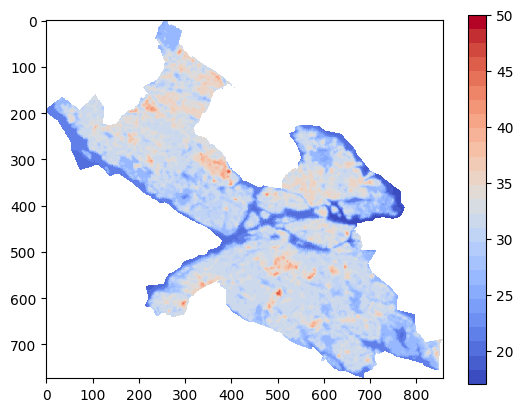

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:data = src.read(1)

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan baserat på de faktiska värdena i datafilen
vmin = np.nanmin(data)
vmax = 50

# Skapa en lista med färgkoder
cmap_custom = ["#436db0", "#5082bb", "#6095c5", "#71a9cf", "#83b9d8", "#97c9e0", "#aad8e9", "#bde2ee", "#cfebf3", "#e1f3f6", "#ecf8e2", "#f7fcce", "#fffcbb", "#fff1aa", "#fee79a", "#fed989", "#fec779", "#fdb668", "#fba15b", "#f88b51", "#f57446", "#e34932", "#d93328", "#c82227", "#b71126", "#a50026"]

# Använd färgkartan
cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))

# Plotta marktemperaturerna med anpassad färgsättning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()



# Värmekarta

<ipython-input-7-103deb662113>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 256)


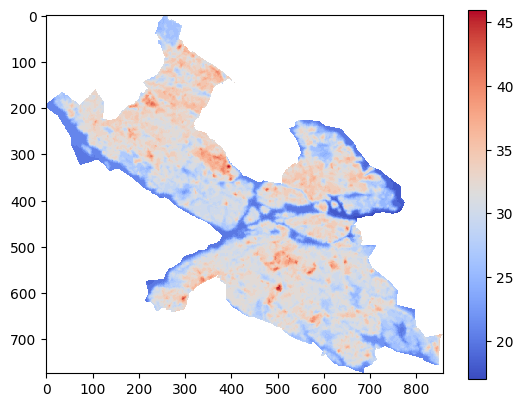

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan baserat på de faktiska värdena i datafilen
vmin = np.nanmin(data)
vmax = np.nanmax(data)
cmap = plt.cm.get_cmap('coolwarm', 256)

# Plotta marktemperaturerna med anpassad färgsättning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()

#Självklart! Här är en fullständig prompt som du kan använda för att återskapa kartan:

#Ladda in GeoTIFF-datafilen med hjälp av rasterio.
#Använd numpy för att konvertera icke-värden till NaN.
#Definiera färgskalan baserat på de faktiska värdena i datafilen.
#Använd matplotlib för att plotta marktemperaturerna med den anpassade färgsättningen.


För att skapa ovanstående Pythonkod behöver du en prompt som beskriver följande steg:

1. **Ladda Geospatial Data från en GeoTIFF-fil:**
   - Starta med att ladda geospatial data för Stockholm från en GeoTIFF-fil som täcker åren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Behandla områden i datan där information saknas (NoData-värden) genom att ersätta dessa med 'NaN' (Not a Number) för att undvika felaktig tolkning av datan.

3. **Ställ in Färgskalan för Värmekartan:**
   - Bestäm den lägsta värdet i datan (som inte är 'NaN') för att använda som minsta värde på färgskalan.
   - Sätt ett maximalt värde för färgskalan, exempelvis 50.

4. **Skapa en Anpassad Färgkarta:**
   - Definiera en lista av färgkoder som ska användas för att visualisera olika värden i datan. Denna lista bör innehålla en serie av färgkoder i hexadecimal format.

5. **Använd en Inbyggd Färgkarta för Plottning:**
   - Använd en inbyggd färgkarta (till exempel 'coolwarm') och justera den efter antalet färger i den anpassade färgkartan.

6. **Plotta Värmekartan:**
   - Visa datan som en värmekarta med den anpassade färgsättningen. Använd de definierade minsta och största värdena för färgskalan och tillämpa en interpolering för att jämna ut övergångarna mellan färger.

7. **Visa en Färgskala och Plotten:**
   - Inkludera en färgskala som visar hur olika färger korrelerar med datans värden.
   - Visa den slutliga plotten.

Den här prompten beskriver processen för att skapa en värmekarta av geospatial data med anpassad färgsättning, där datan laddas från en GeoTIFF-fil och NoData-värden hanteras korrekt. Prompten fokuserar på att visualisera data med specifik färgsättning och inkluderar inte behandling av ytterligare datakällor eller komplexa geospatiala analyser.

# Värmekarta med förskolor


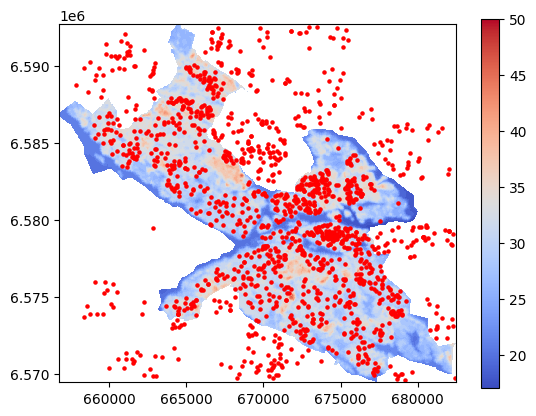

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)
    left, bottom, right, top = src.bounds

# Konvertera icke-värden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera färgskalan
vmin = np.nanmin(data)
vmax = 50

# Plotta marktemperaturerna med inbyggd färgkarta
fig, ax = plt.subplots()
img = ax.imshow(data, cmap='coolwarm', vmin=vmin, vmax=vmax, interpolation='nearest', extent=[left, right, bottom, top])
fig.colorbar(img)

# Ladda in GeoPackage-data
fp = '/content/sample_data/Forskolor_ht23_sweref.gpkg'
data = gpd.read_file(fp)

# Skapa en GeoDataFrame med bounding box
bbox = gpd.GeoDataFrame(geometry=[box(left, bottom, right, top)], crs=data.crs)

# Gör en spatial join
data_within_bbox = gpd.sjoin(data, bbox, predicate='within')

# Plotta förskolorna med samma axel
data_within_bbox.plot(ax=ax, color='red', markersize=5)

# Visa plotten
plt.show()

# Kontrollera att det finns data att plotta
if data.size > 0:
  # Spara figuren som en pdf
  fig.savefig('karta.pdf', format='pdf')
else:
  print('Inga data att plotta.')


Absolut, prompten kan formuleras på ett sätt som beskriver processen utan att gå in på detaljer om specifika programmeringsbibliotek. Här är en förenklad, icke-teknisk beskrivning:

1. **Öppna och Läs en Satellitkarta över Stockholm:**
   - Börja med att öppna en satellitkarta över Stockholm från en fil. Denna karta visar geografiska data från åren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Om det finns några områden på kartan där data saknas, se till att dessa områden inte inkluderas i vidare analys.

3. **Skapa en Värmekarta:**
   - Använd kartan för att skapa en värmekarta som visar olika temperaturer eller andra relevanta mätvärden över Stockholm. Välj färger som tydligt visar variationer i datan.

4. **Ladda Punkter för Förskolor:**
   - Ladda in en annan fil som innehåller information om positioner för förskolor i Stockholm.

5. **Anpassa Förskolepositionerna till Kartan:**
   - Justera informationen om förskolor så att den endast visar de som ligger inom det område som din satellitkarta täcker.

6. **Kombinera Värmekartan med Förskolepositionerna:**
   - Lägg till markörer för förskolorna på din värmekarta. Dessa bör vara tydligt synliga och skilja sig i färg från värmekartan.

7. **Visa den Färdiga Kartan:**
   - När värmekartan och förskolepositionerna har kombinerats, visa den slutgiltiga kartan. Denna karta ska nu illustrera både geografiska data från satellitbilden och placeringen av förskolor i Stockholm.

Denna beskrivning ger en översikt över processen för att skapa en kombinerad karta med både satellitdata och punktdata för förskolor, utan att gå in på programmeringsdetaljer. Det gör det lättare för en icke-programmerare att förstå och beskriva processen.